In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print('xtrain shape: ',x_train.shape)

xtrain shape:  (60000, 28, 28)


In [ ]:
print('xtest shape: ',x_test.shape)

xtest shape:  (10000, 28, 28)


In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [ ]:
x_train= x_train/255
x_test= x_test/255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4742 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9259


In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9264


[0.26735061407089233, 0.9264000058174133]

In [ ]:
model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[2.74540279e-02, 5.05660807e-07, 4.24573608e-02, ...,
        9.99809146e-01, 1.21482834e-01, 7.40477204e-01],
       [3.65680933e-01, 4.88452287e-03, 9.99354243e-01, ...,
        1.02182358e-12, 1.06295072e-01, 3.14636872e-09],
       [5.11871069e-04, 9.93978798e-01, 6.52921438e-01, ...,
        1.26222700e-01, 3.45419198e-01, 4.31311019e-02],
       ...,
       [4.47044522e-06, 7.34856440e-06, 9.20263235e-04, ...,
        1.94196716e-01, 5.16941011e-01, 8.05589139e-01],
       [1.20264165e-04, 2.16035070e-04, 1.00094258e-04, ...,
        4.05450555e-05, 6.13185287e-01, 7.83428113e-05],
       [1.11450125e-02, 6.55187904e-10, 1.49687126e-01, ...,
        1.74206409e-08, 1.48233987e-04, 8.84037490e-07]], dtype=float32)

In [ ]:
y_predicted=model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
confusion=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    6,    3,    1,    0],
       [   0, 1119,    3,    1,    0,    1,    4,    2,    5,    0],
       [   8,   10,  926,   11,   12,    5,   13,   11,   32,    4],
       [   5,    0,   23,  908,    3,   28,    2,   12,   20,    9],
       [   1,    2,    2,    1,  925,    0,   12,    3,    9,   27],
       [  12,    3,    3,   27,   12,  775,   17,    7,   29,    7],
       [  11,    3,    7,    1,    8,   10,  913,    2,    3,    0],
       [   1,    7,   24,    3,    9,    0,    0,  944,    1,   39],
       [   8,   10,    7,   14,   10,   20,   10,   11,  874,   10],
       [  11,    7,    1,    9,   38,    6,    0,   16,    5,  916]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True')

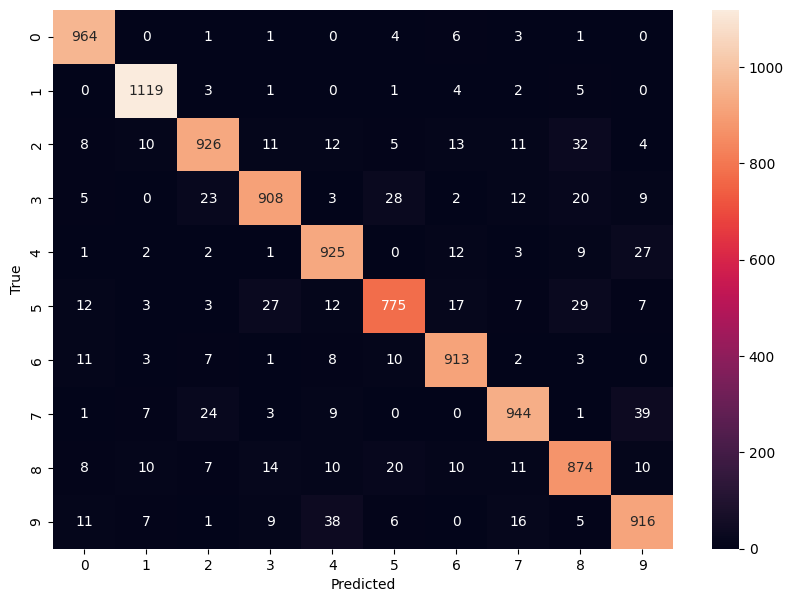

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print('Accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.9264
Accuracy:  0.9264000058174133
